## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max.columns', None)

In [ ]:
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# check dataset shape
house.shape

(21613, 21)

In [ ]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

id and date will not be relevant doing predictions

In [ ]:

house = house.drop(columns = ['id', 'date'])

In [ ]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

5 duplictaed rows dropped 

In [ ]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
columns = house.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", house[col].nunique())
    print(house[col].unique())
    print()

Variable: price
Number of unique values: 4028
[ 221900.  538000.  180000. ...  610685. 1007500.  402101.]

Variable: bedrooms
Number of unique values: 13
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]

Variable: bathrooms
Number of unique values: 30
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

Variable: sqft_living
Number of unique values: 1038
[1180 2570  770 ... 3087 3118 1425]

Variable: sqft_lot
Number of unique values: 9782
[ 5650  7242 10000 ...  5813  2388  1076]

Variable: floors
Number of unique values: 6
[1.  2.  1.5 3.  2.5 3.5]

Variable: waterfront
Number of unique values: 2
[0 1]

Variable: view
Number of unique values: 5
[0 3 4 2 1]

Variable: condition
Number of unique values: 5
[3 5 4 1 2]

Variable: grade
Number of unique values: 12
[ 7  6  8 11  9  5 10 12  4  3 13  1]

Variable: sqft_above
Number of unique values: 946
[1180 2170  770 1050 1680 3890 1715 1060 1890 

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [ ]:
numerical_train = house.select_dtypes(include = ['int','float'])
numerical_train.head(2)

null_series = numerical_train.isnull().sum()
print(null_series.shape)

full_cols_series = null_series[null_series == 0]
print(full_cols_series.shape)

(19,)
(19,)


In [ ]:
# create list to store column names to test against 'price'
train_subset = house[full_cols_series.index]

corr = train_subset.corr()

SalePrice_corr = corr ['price']
SalePrice_corr

# '''
# Select just the Price column from the resulting data frame, compute the absolute value of each term, 
# sort the resulting Series by the correlation values, and assign to sorted_corrs.
# '''

ab = SalePrice_corr.abs()

sorted_corrs = ab.sort_values(ascending=False)
print(sorted_corrs)

price            1.000000
sqft_living      0.702035
grade            0.667541
sqft_above       0.605559
sqft_living15    0.585378
bathrooms        0.525146
view             0.397409
sqft_basement    0.323839
bedrooms         0.308326
lat              0.307002
waterfront       0.266371
floors           0.256893
yr_renovated     0.126489
sqft_lot         0.089652
sqft_lot15       0.082435
yr_built         0.054062
zipcode          0.053179
condition        0.036345
long             0.021587
Name: price, dtype: float64


What have you noticed? What will you do next?
1. There is a strong relationship between price with variables sqft_living, grade, sqft_above, sqft_living15 and bathrooms 
2. the rest have no strong relationship between price and the rest of the features

### 3.2 Checking for outliers

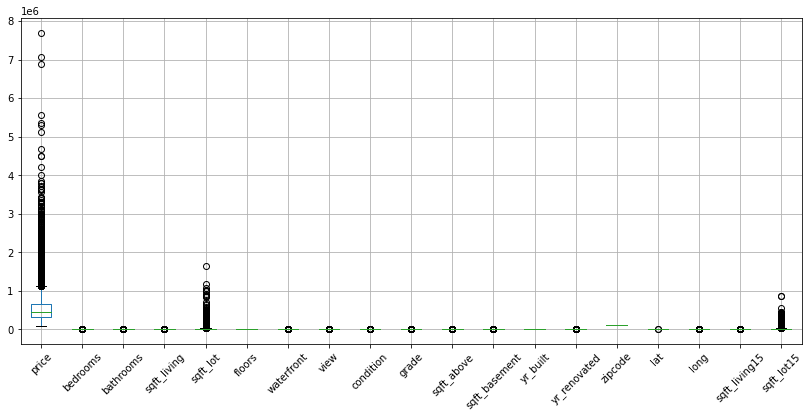

In [ ]:
# looking for outliers
num_cols = house.columns.to_list()
# num_cols.remove('price')
# num_cols.remove('sqft_lot')
# num_cols.remove('sqft_lot15')

plt.figure(figsize = (14, 6))
house.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

- Price, sqft_lot, sqft_lot15, sqft_living, and sqft_above have the most outliers. 
- The distribution is skewed to the right

In [ ]:
# getting the records with outliers
q1 = house.quantile(0.25)
q3 = house.quantile(0.75)
iqr = q3 - q1

outliers_df = house[((house < (q1 - 1.5 * iqr)) | (house > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(6677, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11620,2795000.0,5,3.25,4590,12793,2.0,0,2,5,11,3590,1000,1928,0,98199,47.6453,-122.410,2920,8609
1873,616300.0,3,2.00,1700,8400,2.0,0,2,3,7,1700,0,1927,0,98033,47.6825,-122.190,1820,9000
949,1029900.0,3,2.50,3680,13384,2.0,0,0,3,10,3680,0,1994,0,98006,47.5484,-122.119,3600,11306


In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / house.shape[0]) * 100, 2)

30.9

What observations can you make? What actions are you going to take next?

30.9% is a fairly large number of records to drop, so we will not drop our outliers.

### 3.3 Checking multicollinearity

In [ ]:
# checking the correlations between the numerical variables
cor = house.corr()
cor

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


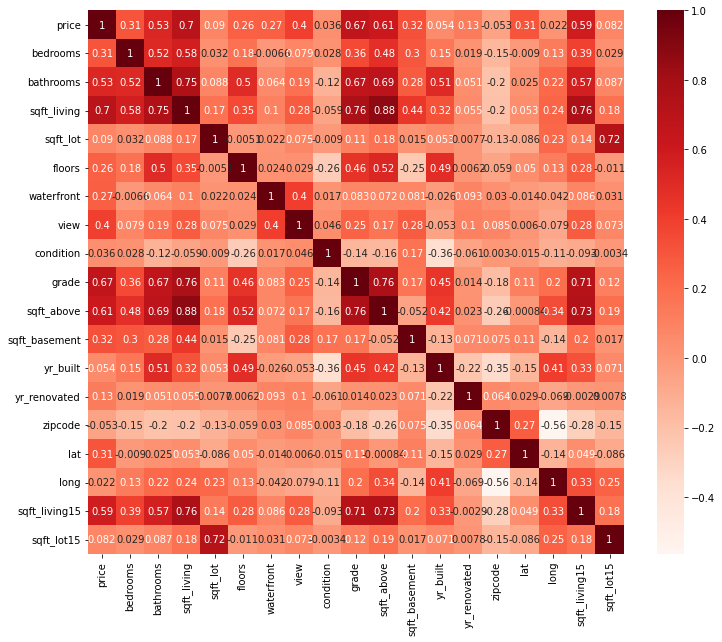

In [ ]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(12,10))
cor = house.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

What have you noticed? What actions are you going to take next regarding this?

The variables are not strongly correlated hence i will not drop any columns

In [ ]:
# check VIF scores

features = house.drop(['price'], axis =1 )
features

unit_train = features/(features.max())
sorted_vars = unit_train.var().sort_values(ascending = False)
print(sorted_vars)

yr_renovated     3.970615e-02
view             3.668840e-02
floors           2.379618e-02
condition        1.694069e-02
sqft_living15    1.218238e-02
bathrooms        9.269800e-03
sqft_basement    8.432443e-03
grade            8.176104e-03
sqft_above       7.745144e-03
waterfront       7.486944e-03
sqft_living      4.601787e-03
sqft_lot15       9.824545e-04
bedrooms         7.943901e-04
sqft_lot         6.292747e-04
yr_built         2.124717e-04
lat              8.412790e-06
long             1.347604e-06
zipcode          2.968966e-07
dtype: float64


We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# split into features (X) and label (Y)
x = house.drop(['price'], axis =1 )
x

y = house['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21608, dtype: float64

In [ ]:
# split into 80-20 train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#confirm size of datasets
print(house.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21608, 19)
(17286, 18)
(4322, 18)
(17286,)
(4322,)


In [ ]:
# fit regressor to data and make predictions
lr = LinearRegression()
reg = lr.fit(X_train,y_train)

#predictions
lr_y_pred = lr.predict(X_test) 

print("test sales predictions:", lr_y_pred)


test sales predictions: [  80056.64416068  331551.82553645  627649.68819308 ...  525946.07301276
  229723.41480406 1092725.488665  ]


In [ ]:
# evaluate RMSE and r-squared scores

test_rmse = np.sqrt(mean_squared_error(y_test,lr_y_pred))
print ("test rmse:", test_rmse)

from sklearn.metrics import r2_score

r2 = r2_score(y_test,lr_y_pred)
print('r2 score is', r2)

test rmse: 194615.27495422406
r2 score is 0.6882331365347419


What conclusions have you drawn?
- r2 score is closer to 1 hence this is a good model

### 4.1 Test for normality and homoscedasticity

In [32]:
#predictions
y_pred = lr.predict(X_train) 

Mean of Residuals 9.432617787422163e-09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

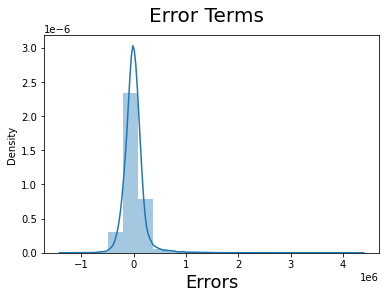

In [35]:
# create a dataframe of residuals
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

# plotting our residuals
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

What is your interpretation of the residual plot?

The differences in residuals between the true value and the predicted is good since its close to zero 

In [61]:
from scipy.stats import bartlett

# using the scipy bartlett function to get our test result and p-value
ctrl = house.query('waterfront == 0')['price']
trt1 = house.query('waterfront == 1')['price']

test_result, p_value = bartlett(ctrl, trt1)


print("statistic value:", test_result)
print("p value:", p_value)


# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

statistic value: 1138.007627865983
p value: 1.8124670068727796e-249
Critical value: inf


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [62]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [40]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 202440.9424180919

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 222141.54239257495

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 227746.7466572356

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 237770.6405667392

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 250629.88383088305

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 266721.36738110107

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 290128.0715574675

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 289968.4479334681

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 288069.97760697996

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 125192.43156254945

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 121117.05072812104

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [41]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: 0.3169191609927319
Gradient Boosting R-squared Score: 0.8482131834922497
XG Boosting R-squared Score: 0.8486817105103923


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.